# Week 07 Handson - Association Rule
In this hands-on session, we will try to uncover the association rule from given transaction items. Association rule mining is a technique to identify underlying relations between different items. We will cover:
1. data preprocessing for association rule,
2. implement algorithm for association rule,
3. find interesting association rule from dataset

## Read dataset "dataset_association_rule.dat"

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('dataset_association_rule.dat', header=None)
df.head()

# print(len(df))
# print(df.shape)

,0
0,36 69 115 226 278 343 345 358 368 370 401 450 ...
1,8 51 55 73 78 117 140 175 187 229 266 295 304 ...
2,53 55 98 159 192 322 332 402 412 413 424 430 4...
3,48 203 205 227 279 294 320 335 359 414 509 525...
4,58 69 73 82 120 146 166 178 217 220 244 256 33...


## Milestone 01 (M01)
Based on the dataset given to you, perform data pre-processing so that the data become ready to be fed to the algorithm (you may use any library providing you an assocation rule API). Save the result of pre-processed data in a variable called 'item_belanja'.<br>

In [24]:
#put your code here for M01

item_belanja = []
for i in range(0, df.shape[0]):
    item_belanja.append(df.values[i][0].split())

# item_belanja = np.array(item_belanja)    

Print the pre-processing result (you may print only some parts of the data) :

In [25]:
item_belanja

[['36',
  '69',
  '115',
  '226',
  '278',
  '343',
  '345',
  '358',
  '368',
  '370',
  '401',
  '450',
  '489',
  '494',
  '573',
  '577',
  '581',
  '583',
  '610',
  '682',
  '692',
  '705',
  '722',
  '832',
  '862',
  '886',
  '908',
  '923',
  '932',
  '960',
  '977'],
 ['8',
  '51',
  '55',
  '73',
  '78',
  '117',
  '140',
  '175',
  '187',
  '229',
  '266',
  '295',
  '304',
  '366',
  '381',
  '413',
  '424',
  '429',
  '501',
  '512',
  '523',
  '529',
  '538',
  '572',
  '575',
  '576',
  '593',
  '675',
  '676',
  '688',
  '735',
  '758',
  '785',
  '797',
  '812',
  '823',
  '826',
  '843',
  '854',
  '868',
  '871',
  '888',
  '893',
  '956',
  '982'],
 ['53',
  '55',
  '98',
  '159',
  '192',
  '322',
  '332',
  '402',
  '412',
  '413',
  '424',
  '430',
  '450',
  '480',
  '526',
  '538',
  '569',
  '571',
  '572',
  '598',
  '666',
  '672',
  '694',
  '701',
  '797',
  '809',
  '820',
  '826',
  '897',
  '904',
  '928',
  '943',
  '952',
  '956',
  '992'],
 ['48',
 

In [34]:
# count number of elements in the dataset:
total_elements = len(item_belanja) * len(item_belanja[0])
display(count)

3100000

In [36]:
# Count number of occurences of every value in the dataset
from collections import Counter

value_counts = Counter(x for xs in item_belanja for x in set(xs))
display(value_counts)
# EQUALS TO:

# >>> c = Counter()
# >>> for xs in seq:
# ...     for x in set(xs):
# ...         c[x] += 1
# ...
# >>> c

Counter({'69': 8975,
         '358': 2658,
         '581': 7803,
         '977': 507,
         '450': 13324,
         '832': 2877,
         '692': 17203,
         '908': 402,
         '923': 2972,
         '368': 28738,
         '115': 10377,
         '583': 5594,
         '226': 3734,
         '610': 1885,
         '862': 11823,
         '343': 7155,
         '345': 5882,
         '705': 3882,
         '489': 18921,
         '494': 10226,
         '577': 5278,
         '932': 3952,
         '370': 1599,
         '401': 12303,
         '886': 10502,
         '682': 17427,
         '960': 3568,
         '36': 2214,
         '573': 8426,
         '722': 16203,
         '278': 2527,
         '529': 23384,
         '501': 945,
         '51': 7815,
         '758': 8529,
         '688': 3704,
         '575': 3829,
         '576': 7069,
         '117': 3484,
         '593': 10805,
         '538': 12140,
         '266': 9357,
         '366': 5682,
         '572': 6748,
         '73': 10212,
  

In [37]:
# count support val for every value:
for key,val in value_counts.items():
    value_counts[key] = val / total_elements
    
display(value_counts)

Counter({'69': 0.0028951612903225805,
         '358': 0.0008574193548387096,
         '581': 0.0025170967741935486,
         '977': 0.0001635483870967742,
         '450': 0.004298064516129033,
         '832': 0.0009280645161290322,
         '692': 0.0055493548387096775,
         '908': 0.00012967741935483872,
         '923': 0.0009587096774193548,
         '368': 0.009270322580645161,
         '115': 0.0033474193548387095,
         '583': 0.0018045161290322581,
         '226': 0.001204516129032258,
         '610': 0.0006080645161290323,
         '862': 0.0038138709677419357,
         '343': 0.002308064516129032,
         '345': 0.0018974193548387096,
         '705': 0.001252258064516129,
         '489': 0.006103548387096774,
         '494': 0.003298709677419355,
         '577': 0.0017025806451612903,
         '932': 0.0012748387096774194,
         '370': 0.0005158064516129033,
         '401': 0.003968709677419355,
         '886': 0.003387741935483871,
         '682': 0.0056216129032258

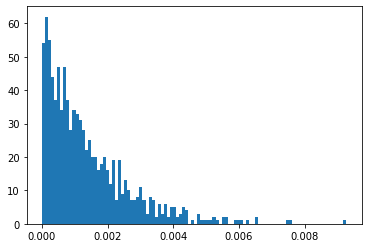

In [47]:
values = value_counts.values()

# plot value data distribution at each element
# plt.barh(values, np.arange(len(values)))
# plt.show()

# plot frequency of each values
plt.hist(values, bins=100)
plt.show()

In [56]:
# min-support is the 0.75 percentile
min_support = np.percentile(list(values), 75)
display(min_support)

0.0019217741935483872

## M02
In this step, you will generate association rules from your ready-to-go-dataset.<br><br>
a. Again, choose the library you will use for generating association rules, mention what the algorithm is, and explain the reason/s why you choose it<br>
b. Using the library that you've chosen in (M02.a), generate association rules from the pre-processed dataset in M01.<br>
c. Print the association rule that you've found in M02.b along with their support and confidence scores.<br>
d. What is/are your conclusion/s from the association rules you obtain?

Your answer (M02.a):

In [ ]:
#put your code here for M02.b
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

association_rules = apriori(item_belanja, min_support=min_support, min_confidence=0.2, min_lift=2, min_length=2)
association_results = list(association_rules)

In [29]:
#put your code here for M02.c
print(len(association_results))

0


Your conclusion (M02.d):